In [1]:
import numpy as np
from matplotlib import pyplot as plt

from pyloki.config import ParamLimits, PulsarSearchConfig
from pyloki.core.taylor import generate_branching_pattern
from pyloki.detection import thresholding
from pyloki.ffa import DynamicProgramming
from pyloki.periodogram import PruningStatsPlotter, ScatteredPeriodogram
from pyloki.prune import prune_dyp_tree
from pyloki.simulation.pulse import PulseSignalConfig

tobs = 2147.483648


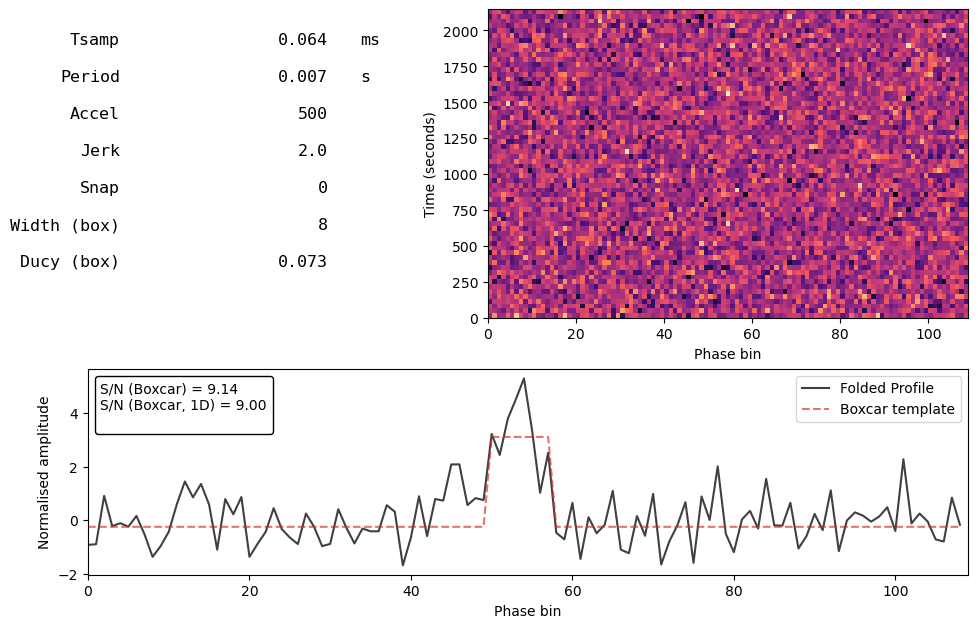

In [2]:
pulsar_period = 0.007
dt = 64e-6
accel = 500
jerk = 2.0
nsamps = 2**25
mod_kwargs = {"acc": accel, "jerk": jerk}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=9.0, ducy=0.1,
                        mod_kwargs=mod_kwargs)
print(f"tobs = {cfg.tobs}")
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
tol_bins = 1 #cfg.tol_bins
fold_bins = 64 # cfg.fold_bins
p = ParamLimits.from_upper([jerk, accel, cfg.freq], (0, jerk * 1.2), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 2048
bseg_ffa = cfg.nsamps // 128
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, bseg_ffa=bseg_ffa, prune_poly_order=3, ducy_max=0.2, wtsp=1.5, use_fft_shifts=True)
dyp = DynamicProgramming(tim_data, search_cfg)
dyp.initialize()
dyp.execute()

Param limits: [(np.float64(0.0), np.float64(2.4)), (np.float64(-2076.9803776), np.float64(3076.9803776)), (np.float64(141.94204468254014), np.float64(143.77224103174555))]


2025-06-12 13:26:26 INFO     - pyloki.ffa - FFA initialize: Grid sizes: [1.35646060e+06 2.37058672e+05             
                             2.98023224e-02]

                    INFO     - pyloki.ffa - ffa level:  0, leaves: 5.93, fold dims: (2048, 1, 1, 61, 2, 33)

                    INFO     - pyloki.ffa - ffa_initialize finished, Elapsed time: 0.470 seconds

Output()

2025-06-12 13:26:29 INFO     - pyloki.ffa - ffa level:  1, leaves:  6.93, fold dims: (1024, 1, 1, 122, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  2, leaves:  7.94, fold dims: (512, 1, 1, 245, 2, 33)

2025-06-12 13:26:30 INFO     - pyloki.ffa - ffa level:  3, leaves:  8.94, fold dims: (256, 1, 1, 491, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  4, leaves: 12.26, fold dims: (128, 1, 5, 982, 2, 33)

                    INFO     - pyloki.ffa - FFA complete: Grid sizes: [3.31167139e+02 9.26010437e+02               
                             1.86264515e-03]

                    INFO     - pyloki.ffa - ffa_execute finished, Elapsed time: 3.253 seconds

In [4]:
branching_pattern = generate_branching_pattern(dyp.param_arr, dyp.dparams_limited, dyp.cfg.param_limits, dyp.cfg.tseg_ffa, dyp.nsegments - 1,
                                               dyp.cfg.nbins, dyp.cfg.tol_bins, 0)
branching_pattern

array([4, 9, 1, 3, 1, 9, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1,
       1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1])

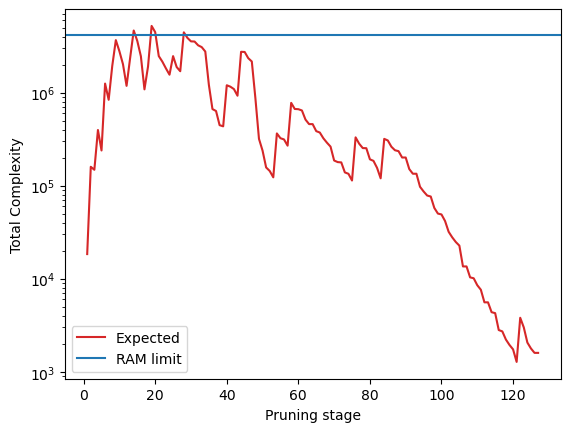

In [5]:
thresholds = np.array([2. , 2. , 2.1, 2.2, 2.6, 2.8, 2.9, 2.9, 3.1, 3.1, 3.2, 3.4, 3.5,
       3.6, 3.6, 3.7, 4. , 4.1, 3.9, 3.9, 4.2, 4.1, 4.1, 4.1, 4.4, 4.4,
       4.3, 4.3, 4.3, 4.2, 3.9, 4.1, 4. , 4.1, 4.6, 4.8, 4.6, 4.8, 4.6,
       4.6, 4.5, 4.5, 4.6, 4.4, 4.2, 4.5, 4.5, 5. , 5.3, 5.3, 5.4, 5.3,
       5.3, 5.1, 5.2, 5.1, 5.2, 5.1, 5.2, 5. , 5. , 5.2, 5.2, 4.9, 5.2,
       5.1, 5.2, 5.2, 5.2, 5.4, 5.3, 5.1, 5.4, 5.3, 5.4, 5.3, 5.4, 5.4,
       5.2, 5.5, 5.4, 5.5, 5.6, 5.6, 5.5, 5.6, 5.6, 5.5, 5.6, 5.2, 5.7,
       5.7, 5.4, 5.8, 5.8, 5.8, 5.7, 5.9, 5.9, 5.8, 5.9, 6. , 6. , 6. ,
       6. , 6.2, 5.8, 6.2, 6.1, 6.2, 6.2, 6.3, 6. , 6.3, 6.2, 6.4, 6.3,
       6.4, 6.4, 6.4, 6.5, 6.3, 6.5, 6.6, 6.6, 6.6, 6.2])
thresh_state = thresholding.evaluate_scheme(thresholds, branching_pattern, ref_ducy=0.1, nbins=64,
                                            ntrials=1024, snr_final=9.5, ducy_max=0.2, wtsp=1.5)
x = np.arange(1, len(branching_pattern) + 1)
plt.semilogy(x, np.array(thresh_state.get_info("complexity")) * dyp.nparam_vol, label="Expected", c="tab:red")
plt.axhline(2**22, label="RAM limit", c="tab:blue")
plt.xlabel("Pruning stage")
plt.ylabel("Total Complexity")
plt.legend()
plt.show()

In [6]:
result_file = prune_dyp_tree(dyp, thresholds, n_runs=16, max_sugg=2**22, outdir="jerk_test/", file_prefix="test_jerk",
                             kind="taylor", n_workers=8)

2025-06-12 13:26:30 INFO     - pyloki.prune - Starting Pruning for 16 runs, with 8 workers

Output()

2025-06-12 13:26:35 INFO     - worker_000 - Initializing pruning run with ref segment: 0

                    INFO     - worker_000 - prune_initialize finished, Elapsed time: 0.044 seconds

2025-06-12 13:26:37 INFO     - worker_008 - Initializing pruning run with ref segment: 8

                    INFO     - worker_008 - prune_initialize finished, Elapsed time: 0.043 seconds

2025-06-12 13:26:39 INFO     - worker_016 - Initializing pruning run with ref segment: 16

                    INFO     - worker_016 - prune_initialize finished, Elapsed time: 0.041 seconds

2025-06-12 13:26:41 INFO     - worker_025 - Initializing pruning run with ref segment: 25

                    INFO     - worker_025 - prune_initialize finished, Elapsed time: 0.044 seconds

2025-06-12 13:26:44 INFO     - worker_033 - Initializing pruning run with ref segment: 33

                    INFO     - worker_033 - prune_initialize finished, Elapsed time: 0.038 seconds

2025-06-12 13:26:46 INFO     - worker_042 - Initializing pruning run with ref segment: 42

                    INFO     - worker_042 - prune_initialize finished, Elapsed time: 0.052 seconds

2025-06-12 13:26:49 INFO     - worker_050 - Initializing pruning run with ref segment: 50

                    INFO     - worker_050 - prune_initialize finished, Elapsed time: 0.042 seconds

2025-06-12 13:26:52 INFO     - worker_059 - Initializing pruning run with ref segment: 59

                    INFO     - worker_059 - prune_initialize finished, Elapsed time: 0.046 seconds

2025-06-12 13:31:24 INFO     - worker_016 - Pruning run complete for ref segment: 16

                    INFO     - worker_016 - Pruning stats: Score: 7.70, Leaves: 10.29

                    INFO     - worker_016 - Pruning time: Total: 241.5s (score: 42% | shift_add: 34% | threshold:  
                             10% | branch: 8%)

                    INFO     - worker_067 - prune_initialize finished, Elapsed time: 0.021 seconds

2025-06-12 13:31:35 INFO     - worker_042 - Pruning run complete for ref segment: 42

                    INFO     - worker_042 - Pruning stats: Score: 7.60, Leaves: 10.30

                    INFO     - worker_042 - Pruning time: Total: 244.9s (score: 43% | shift_add: 34% | branch: 9% |
                             threshold: 9%)

2025-06-12 13:31:39 INFO     - worker_000 - Pruning run complete for ref segment: 0

                    INFO     - worker_000 - Pruning stats: Score: 7.83, Leaves: 10.68

                    INFO     - worker_000 - Pruning time: Total: 258.6s (score: 43% | shift_add: 34% | threshold:  
                             9% | branch: 9%)

                    INFO     - worker_076 - prune_initialize finished, Elapsed time: 0.023 seconds

2025-06-12 13:31:47 INFO     - worker_050 - Pruning run complete for ref segment: 50

                    INFO     - worker_050 - Pruning stats: Score: 7.64, Leaves: 10.32

                    INFO     - worker_050 - Pruning time: Total: 254.1s (score: 43% | shift_add: 33% | threshold:  
                             10% | branch: 8%)

2025-06-12 13:31:53 INFO     - worker_084 - Initializing pruning run with ref segment: 84

2025-06-12 13:31:55 INFO     - worker_093 - Initializing pruning run with ref segment: 93

                    INFO     - worker_093 - prune_initialize finished, Elapsed time: 0.027 seconds

2025-06-12 13:32:04 INFO     - worker_059 - Pruning run complete for ref segment: 59

                    INFO     - worker_059 - Pruning stats: Score: 7.70, Leaves: 10.39

                    INFO     - worker_059 - Pruning time: Total: 267.0s (score: 43% | shift_add: 34% | threshold:  
                             10% | branch: 9%)

2025-06-12 13:32:08 INFO     - worker_101 - Initializing pruning run with ref segment: 101

                    INFO     - worker_101 - prune_initialize finished, Elapsed time: 0.028 seconds

2025-06-12 13:32:27 INFO     - worker_025 - Pruning run complete for ref segment: 25

                    INFO     - worker_025 - Pruning stats: Score: 7.89, Leaves: 10.38

                    INFO     - worker_025 - Pruning time: Total: 298.7s (score: 52% | shift_add: 29% | threshold:  
                             8% | branch: 7%)

2025-06-12 13:32:32 INFO     - worker_110 - Initializing pruning run with ref segment: 110

                    INFO     - worker_110 - prune_initialize finished, Elapsed time: 0.044 seconds

2025-06-12 13:32:48 INFO     - worker_008 - Pruning run complete for ref segment: 8

                    INFO     - worker_008 - Pruning stats: Score: 7.88, Leaves: 10.16

                    INFO     - worker_008 - Pruning time: Total: 317.2s (score: 52% | shift_add: 29% | threshold:  
                             7% | branch: 7%)

                    INFO     - worker_118 - prune_initialize finished, Elapsed time: 0.028 seconds

2025-06-12 13:33:04 INFO     - worker_033 - Pruning run complete for ref segment: 33

                    INFO     - worker_033 - Pruning stats: Score: 7.70, Leaves: 10.26

                    INFO     - worker_033 - Pruning time: Total: 326.3s (score: 52% | shift_add: 28% | threshold:  
                             8% | branch: 7%)

2025-06-12 13:33:08 INFO     - worker_127 - Initializing pruning run with ref segment: 127

                    INFO     - worker_127 - prune_initialize finished, Elapsed time: 0.031 seconds

2025-06-12 13:36:51 INFO     - worker_067 - Pruning run complete for ref segment: 67

                    INFO     - worker_067 - Pruning stats: Score: 8.88, Leaves: 11.83

                    INFO     - worker_067 - Pruning time: Total: 274.3s (score: 42% | shift_add: 33% | threshold:  
                             10% | branch: 9%)

2025-06-12 13:37:07 INFO     - worker_076 - Pruning run complete for ref segment: 76

                    INFO     - worker_076 - Pruning stats: Score: 9.01, Leaves: 12.55

                    INFO     - worker_076 - Pruning time: Total: 280.5s (score: 43% | shift_add: 34% | threshold:  
                             9% | branch: 9%)

2025-06-12 13:37:11 INFO     - worker_084 - Pruning run complete for ref segment: 84

                    INFO     - worker_084 - Pruning stats: Score: 7.94, Leaves: 10.78

                    INFO     - worker_084 - Pruning time: Total: 270.8s (score: 42% | shift_add: 34% | threshold:  
                             9% | branch: 9%)

2025-06-12 13:37:17 INFO     - worker_101 - Pruning run complete for ref segment: 101

                    INFO     - worker_101 - Pruning stats: Score: 7.79, Leaves: 10.53

                    INFO     - worker_101 - Pruning time: Total: 264.6s (score: 43% | shift_add: 34% | threshold:  
                             9% | branch: 9%)

2025-06-12 13:37:25 INFO     - worker_093 - Pruning run complete for ref segment: 93

                    INFO     - worker_093 - Pruning stats: Score: 7.64, Leaves: 10.31

                    INFO     - worker_093 - Pruning time: Total: 282.2s (score: 43% | shift_add: 34% | threshold:  
                             9% | branch: 9%)

2025-06-12 13:38:19 INFO     - worker_127 - Pruning run complete for ref segment: 127

                    INFO     - worker_127 - Pruning stats: Score: 8.50, Leaves: 10.60

                    INFO     - worker_127 - Pruning time: Total: 280.7s (score: 52% | shift_add: 28% | threshold:  
                             8% | branch: 7%)

2025-06-12 13:38:26 INFO     - worker_110 - Pruning run complete for ref segment: 110

                    INFO     - worker_110 - Pruning stats: Score: 8.05, Leaves: 10.51

                    INFO     - worker_110 - Pruning time: Total: 312.0s (score: 52% | shift_add: 28% | threshold:  
                             7% | branch: 7%)

2025-06-12 13:38:32 INFO     - worker_118 - Pruning run complete for ref segment: 118

                    INFO     - worker_118 - Pruning stats: Score: 7.83, Leaves: 10.34

                    INFO     - worker_118 - Pruning time: Total: 302.5s (score: 53% | shift_add: 28% | threshold:  
                             8% | branch: 7%)

2025-06-12 13:38:34 INFO     - pyloki.prune - Pruning complete. Results saved to                                   
                             jerk_test/test_jerk_pruning_nstages_128_results.h5

In [7]:
pgram = ScatteredPeriodogram.load(result_file)
print(f"True params, j: {cfg.mod_kwargs["jerk"]:.3f}, a: {cfg.mod_kwargs["acc"]:.3f}, f: {cfg.freq:.10f}")
print(pgram.get_summary_cands(10, run_id=None))

True params, j: 2.000, a: 500.000, f: 142.8571428571
Top candidates:
dparams: djerk: 0.0001219326322, daccel: 0.1058539595, dfreq: 2.299561913e-05
Run: 076_10, S/N: 9.01, jerk: 1.99927, accel: 499.52, freq: 142.857138
Run: 076_10, S/N: 9.00, jerk: 1.99939, accel: 499.81, freq: 142.857131
Run: 076_10, S/N: 8.99, jerk: 1.99939, accel: 499.71, freq: 142.857118
Run: 076_10, S/N: 8.98, jerk: 1.99768, accel: 500.17, freq: 142.857159
Run: 076_10, S/N: 8.98, jerk: 1.99915, accel: 499.55, freq: 142.857137
Run: 076_10, S/N: 8.96, jerk: 1.99927, accel: 499.84, freq: 142.857129
Run: 076_10, S/N: 8.95, jerk: 1.99781, accel: 500.15, freq: 142.857160
Run: 076_10, S/N: 8.95, jerk: 1.99902, accel: 499.57, freq: 142.857158
Run: 076_10, S/N: 8.93, jerk: 1.99988, accel: 499.71, freq: 142.857113
Run: 076_10, S/N: 8.93, jerk: 1.99939, accel: 499.50, freq: 142.857139


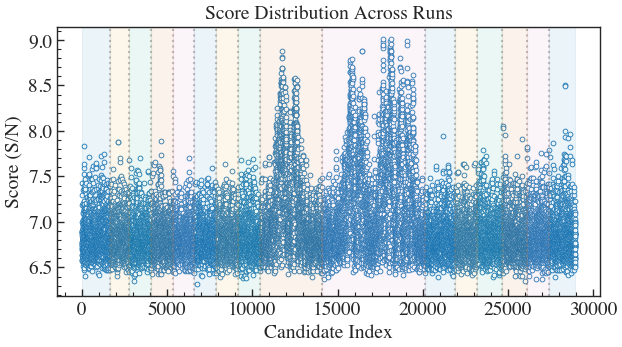

In [8]:
pgram.plot_scores(kind="scatter", run_id=None)
plt.show()

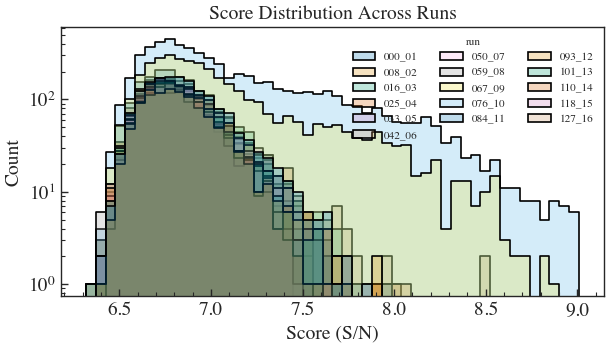

In [9]:
pgram.plot_scores(kind="hist", run_id=None)
plt.show()

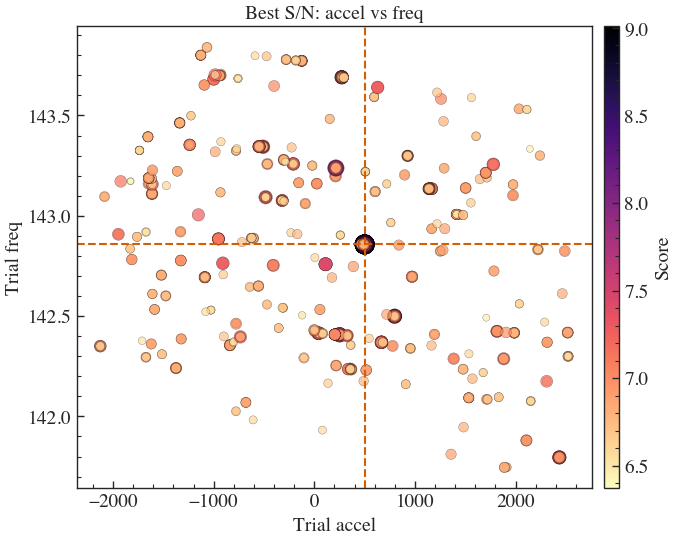

In [13]:
pgram.plot_correlation("accel", "freq", true_values={"accel": cfg.mod_kwargs["acc"], "freq": cfg.freq}, run_id="076_10")
plt.show()

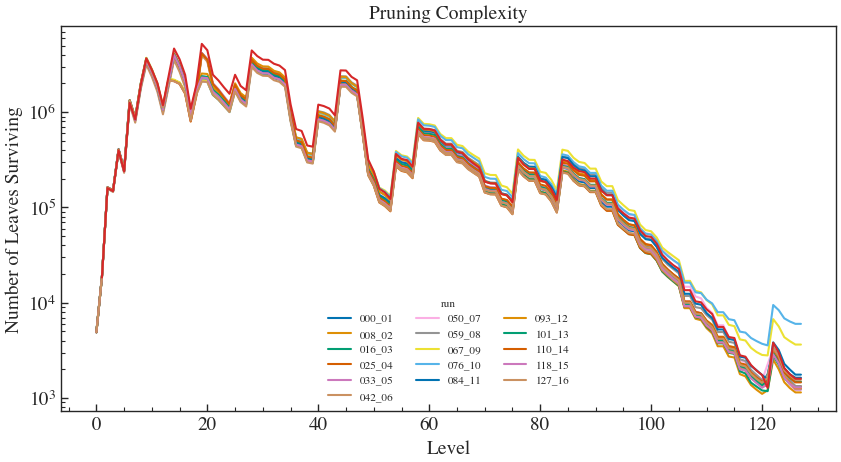

In [11]:
pstats = PruningStatsPlotter.load(result_file)
fig = pstats.plot_level_stats(run_id=None)
x = np.arange(1, len(branching_pattern) + 1)
ax_list = fig.axes
ax_list[0].plot(x, np.array(thresh_state.get_info("complexity")) * dyp.nparam_vol, label="Expected", c="tab:red")
plt.show()